# **Independent T-test or Two Sample T-test**

Independent T-test also called two-sample T-test. It is a statistical method used to compare the means of two indenpendent groups to see statistically significant difference between them.

Why and When we should use it ?
- We use it to test hypotheses about group differences and it help us to understand any observed difference is real or due to random chance.
- There is two independent groups.
- Comparing the means of two numeric/continuous variable.
- Data should be normally distributed.
- Variances are assumed to be equal or testable.

## Dataset

Python code to generate a perfect dataset for performing an Independent T-test. We'll create two independent groups (Group A and Group B) with normally distributed data, ensuring that they have different means, which will give us a noticeable difference when performing the T-test.

### Data Generating Code

In [16]:
# import pandas as pd
# import numpy as np

# # Set a random seed for reproducibility
# np.random.seed(42)

# # Parameters for Group A and Group B
# mean_a = 50  # Mean of Group A
# mean_b = 55  # Mean of Group B
# std_dev = 10  # Standard deviation for both groups
# sample_size = 200  # Number of samples in each group

# # Generate random data for Group A and Group B
# group_a_scores = np.random.normal(loc=mean_a, scale=std_dev, size=sample_size)
# group_b_scores = np.random.normal(loc=mean_b, scale=std_dev, size=sample_size)

# # Create a DataFrame
# data = pd.DataFrame({
#     'Score': np.concatenate([group_a_scores, group_b_scores]),
#     'Group': ['A'] * sample_size + ['B'] * sample_size
# })

# # Save the DataFrame to a CSV file
# data.to_csv('C:/Github Repository/Advanced-Statistical-Methods-for-AB-and-Hypothesis-Testing-Methods-of-Experimentations/datasets/test_score.csv', index=False)

# # Display the first few rows of the dataset
# data.head()


### Loading Dataset

In [17]:
import pandas as pd

data = pd.read_csv('C:/Github Repository/Advanced-Statistical-Methods-for-AB-and-Hypothesis-Testing-Methods-of-Experimentations/datasets/Independent T/test_score.csv')

In [18]:
print(data.head())

       Score Group
0  54.967142     A
1  48.617357     A
2  56.476885     A
3  65.230299     A
4  47.658466     A


## Normality Test (Shapiro-Wilk Test)

In [19]:
from scipy import stats

_, p_value_a = stats.shapiro(data[data['Group'] == 'A']['Score'])
_, p_value_b = stats.shapiro(data[data['Group'] == 'B']['Score'])

print(f"Group A - Shapiro-Wilk Test p-value: {p_value_a:.4f}")
print(f"Group B - Shapiro-Wilk Test p-value: {p_value_b:.4f}")

Group A - Shapiro-Wilk Test p-value: 0.8290
Group B - Shapiro-Wilk Test p-value: 0.2498


- Here we can see Group A and Group B datas are normally distributed. Both Group A and Group B are fail to reject null hypothesis.

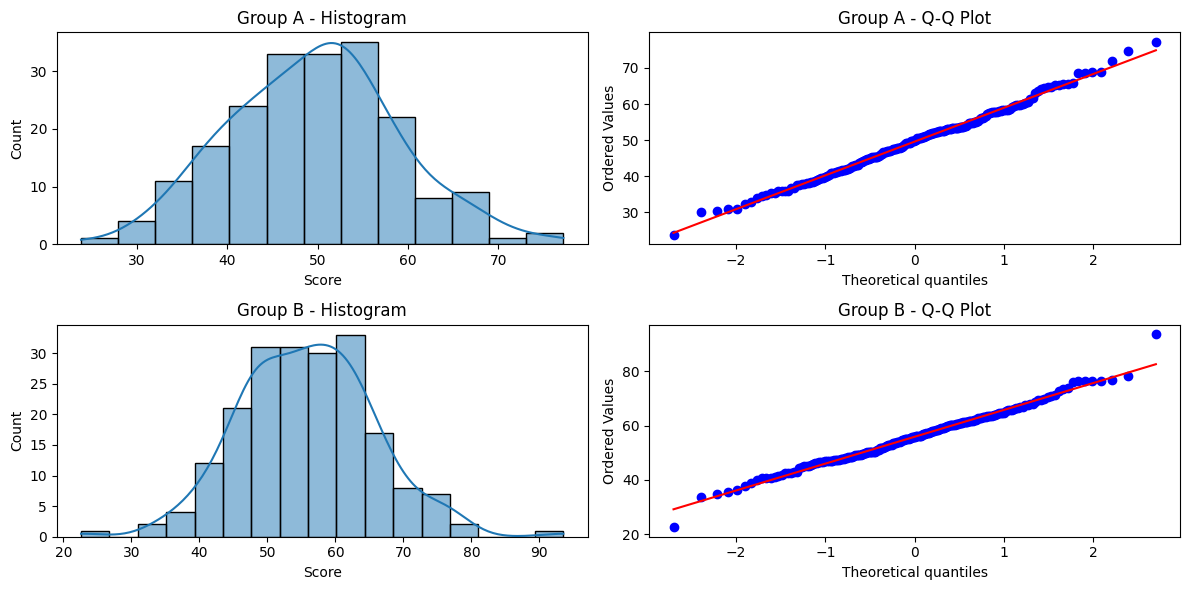

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing histograms and Q-Q plots for both groups
plt.figure(figsize=(12, 6))

# Group A - Histogram and Q-Q plot
plt.subplot(2, 2, 1)
sns.histplot(data[data['Group'] == 'A']['Score'], kde=True)
plt.title("Group A - Histogram")

plt.subplot(2, 2, 2)
stats.probplot(data[data['Group'] == 'A']['Score'], dist="norm", plot=plt)
plt.title("Group A - Q-Q Plot")

# Group B - Histogram and Q-Q plot
plt.subplot(2, 2, 3)
sns.histplot(data[data['Group'] == 'B']['Score'], kde=True)
plt.title("Group B - Histogram")

plt.subplot(2, 2, 4)
stats.probplot(data[data['Group'] == 'B']['Score'], dist="norm", plot=plt)
plt.title("Group B - Q-Q Plot")

plt.tight_layout()
plt.show()


## Levene's Test for Equal Variance

In [21]:
stat, p_value_levene = stats.levene(
    data[data['Group'] == 'A']['Score'],
    data[data['Group'] == 'B']['Score']
)

print(f"Levene's Test p-value: {p_value_levene:.4f}")

# Interpretation
if p_value_levene < 0.05:
    print("The variances are significantly different (reject H₀).")
else:
    print("The variances are equal (fail to reject H₀).")


Levene's Test p-value: 0.5148
The variances are equal (fail to reject H₀).


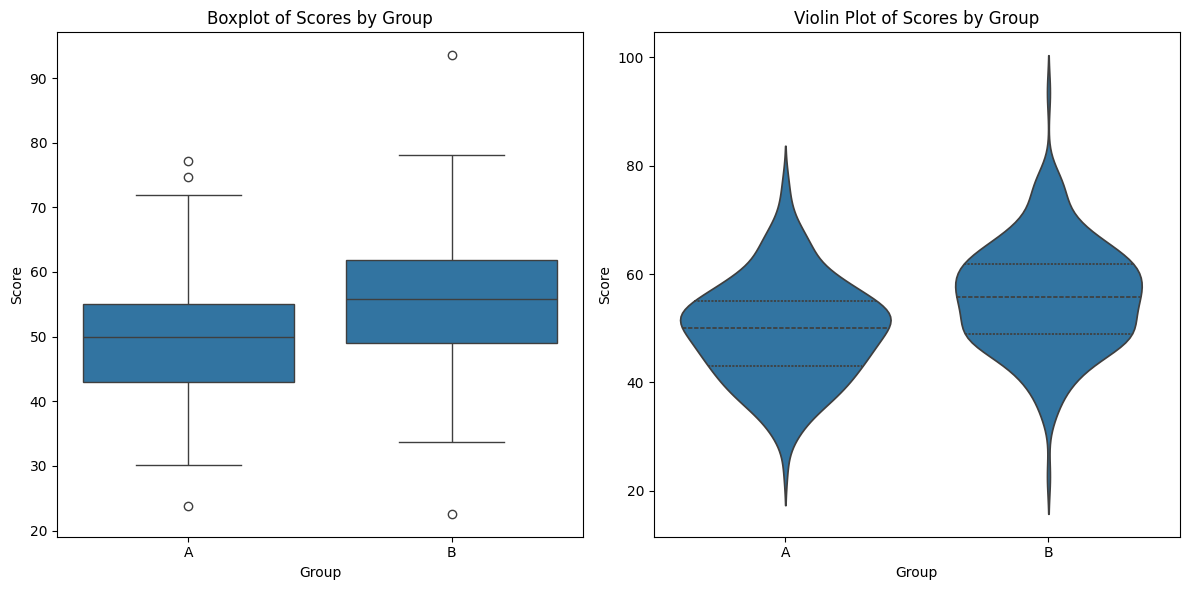

In [22]:
plt.figure(figsize=(12, 6))

# Create a boxplot to visualize the distribution of scores by group
plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='Score', data=data)
plt.title("Boxplot of Scores by Group")
plt.xlabel("Group")
plt.ylabel("Score")

# Create a violin plot to show the distribution and density of the scores by group
plt.subplot(1, 2, 2)
sns.violinplot(x='Group', y='Score', data=data, inner="quart")
plt.title("Violin Plot of Scores by Group")
plt.xlabel("Group")
plt.ylabel("Score")

# Display the plots
plt.tight_layout()
plt.show()



- The p-value is 0.5148 for Levene’s Test is greater than 0.05, which means we fail to reject the null hypothesis (H₀).

- The variances of Group A and Group B are not significantly different, and we can assume that both groups have equal variances. This is an important assumption for performing the Independent T-test.

## Independent T-test Result

In [25]:
from scipy import stats

# Perform the Independent T-test
t_stat, p_value_ttest = stats.ttest_ind(
    data[data['Group'] == 'A']['Score'], 
    data[data['Group'] == 'B']['Score']
)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_ttest:.4f}")

# Interpretation of the results
if p_value_ttest < 0.05:
    print("There is a significant difference between Group A and Group B (reject H₀).")
else:
    print("There is no significant difference between Group A and Group B (fail to reject H₀).")


T-statistic: -6.5315
P-value: 0.0000
There is a significant difference between Group A and Group B (reject H₀).


- The p-value is extremely small (much less than 0.05), which means we reject the null hypothesis (H₀).

- There is a statistically significant difference between Group A and Group B. Since the p-value is extremely small, this result strongly indicates that the difference between the two groups is not due to random chance.